In [1]:
import numpy as np
from astropy.table import Table
from astropy.io.misc.hdf5 import write_table_hdf5
import matplotlib.pyplot as plt
import tables
import h5py
import astropy.table as aTable
from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# def mass_completeness_limit(z):
    
#     x_values = [0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4]
#     y_values = [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1,10.1]

#     f = interp1d(x_values, y_values)
#     return f(z)



# def gathering_data(data, zmin, zmax):

#     cosmos = data
#     mask_zlim = (cosmos['ZPDF'].data > zmin) & (cosmos['ZPDF'].data < zmax)
    
#     z_tot = cosmos['ZPDF'].data[mask_zlim]
#     x_tot = cosmos['MASS_MED'].data[mask_zlim]
    
    
#     mass_comp_lim = mass_completeness_limit(z_tot)
#     # mask_mlim = []
#     # for i in range(len(x_median_tot)):
#     #     mask_mlim.append(x_median_tot[i] > mass_comp_lim[i])
#     mask_mlim = x_tot > mass_completeness_limit(z_tot)
        
    
#     mask = (mask_mlim)
    
#     z = z_tot[mask].astype(np.float32)
#     x = x_tot[mask].astype(np.float32)
    
#     return z, x

# 3D-HST Leja et al.

In [2]:
def mass_completeness_limit(z):
    
    x_values = [0.65, 1.0, 1.5, 2.1, 3.0]
    y_values = [8.72, 9.07, 9.63, 9.79, 10.15]
    
    f = interp1d(x_values, y_values)
    return f(z)


def zmax(mstar):
    y_values = [8.72, 9.07, 9.63, 9.79, 10.15]
    x_values = [0.65, 1.0, 1.5, 2.1, 3.0]

    f = interp1d(y_values, x_values)
    if mstar > y_values[-1]:
        return x_values[-1] 
    else:
        return f(mstar)



def gathering_data(data, zmin, zmax):

    hst = data
    mask_zlim = (hst['z_peak'].data > zmin) & (hst['z_peak'].data < zmax)
    
    z_tot = hst['z_peak'].data[mask_zlim]
    x_tot = hst['lmass'].data[mask_zlim]
    
    
    mass_comp_lim = mass_completeness_limit(z_tot)
    # mask_mlim = []
    # for i in range(len(x_median_tot)):
    #     mask_mlim.append(x_median_tot[i] > mass_comp_lim[i])
    mask_mlim = x_tot > mass_completeness_limit(z_tot)
        
    
    mask = (mask_mlim)
    
    z = z_tot[mask].astype(np.float32)
    x = x_tot[mask].astype(np.float32)
    
    return z, x

In [3]:
hst = Table.read('../data/3dhst_master.phot.v4.1.cat.FITS')

In [4]:
hst[:5]

id,field,ra,dec,x,y,z_spec,z_peak,faper_F140W,eaper_F140W,faper_F160W,eaper_F160W,f_F606W,e_F606W,f_F814W,e_F814W,f_F125W,e_F125W,f_F140W,e_F140W,f_F160W,e_F160W,tot_cor,kron_radius,a_image,b_image,flux_radius,fwhm_image,flags,f140w_flag,star_flag,use_phot,near_star,nexp_f125w,nexp_f140w,nexp_f160w,lmass,Av
float64,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64
1.0,AEGIS,215.22238159,53.00418472,9590.5,3057.3,-1.0,0.01,-82.041,-82.041,22531.0,0.039282,1790.6,0.037991,2804.9,0.057433,25063.0,0.060967,-99.0,-99.0,27188.0,0.32896,1.0088,3.5,9.65,8.82,2.59,3.42,0,0,1,0,0,2,0,3,7.51,1.1
2.0,AEGIS,215.09658813,52.91805267,16473.2,3150.2,-1.0,0.01,3.5078,0.074233,3.9905,0.037441,90.928,1.7795,146.05,2.7091,252.44,3.0231,259.59,5.4934,295.31,1.6266,1.0,4.08,31.13,26.89,38.1,67.52,3,0,0,0,0,4,4,4,5.62,0.1
3.0,AEGIS,215.16146851,52.95946121,13060.1,2982.3,-1.0,0.2062,-1.9043,-1.9043,1.3811,0.054104,26.373,1.2775,37.981,1.8974,66.125,3.2241,-99.0,-99.0,71.802,1.488,1.0,5.37,29.77,7.9,35.1,0.0,1,0,0,1,0,2,0,2,9.0,1.1
4.0,AEGIS,215.30529785,53.0529213,5422.8,2692.1,-1.0,0.0355,-72.325,-72.325,0.82549,0.075126,0.44439,0.032801,0.45982,0.051409,1.1233,0.12688,-99.0,-99.0,1.1299,0.096035,1.161,3.5,2.52,1.75,3.67,0.0,0,0,0,0,0,1,0,1,4.78,0.4
5.0,AEGIS,215.0418396,52.87127304,19894.6,2834.4,-1.0,0.3427,1890.5,0.1333,-99.0,-99.0,212.1,0.028669,705.77,0.044182,-99.0,-99.0,2272.9,0.16026,-99.0,-99.0,1.0645,3.5,4.8,4.56,2.24,3.36,0,1,2,0,1,0,3,0,11.57,0.5


In [5]:
z, x = gathering_data(hst, 0.65, 3.0)

(8.0, 15.0)

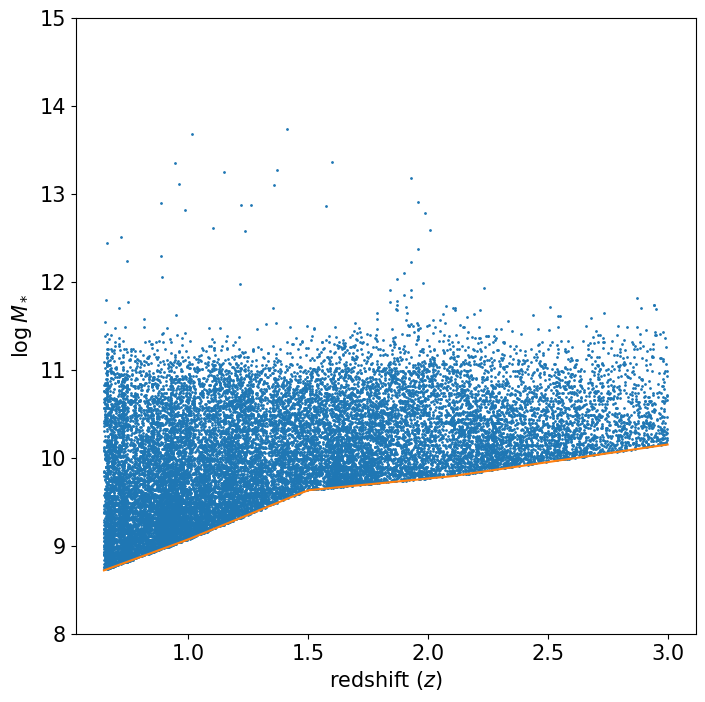

In [6]:
z_lin = np.linspace(0.65, 3.0, 100)
plt.figure(figsize=(8,8))
plt.plot(z, x, 'o', markersize=1)
plt.plot(z_lin, mass_completeness_limit(z_lin))
plt.xlabel(r"redshift ($z$)")
plt.ylabel(r"$\log M_*$")
# plt.xlim(0.5, 3.5)
plt.ylim(8., 15)


In [ ]:
footprint = 0.25 #deg^2

cosmo = FlatLambdaCDM(H0=67.8, Om0=0.307)

dmin3 = cosmo.comoving_distance(0.65).value ** 3
vmax = np.array([4*np.pi/3 * 0.25/41253 * (cosmo.comoving_distance(zmax(m_i)).value ** 3 - dmin3) for m_i in x])

In [ ]:
x_lin = np.linspace(x.min(), x.max(), 100)
for i in range(x_lin.shape[0]):
    plt.scatter(x_lin[i], zmax(x_lin[i]))

In [10]:
vmax

array([6664017.47514103, 6664017.47514103, 4010286.59079552, ...,
       6664017.47514103, 4090701.52882329, 6664017.47514103])

In [ ]:
x_lin[10], zmax(x_lin[10])

In [ ]:
x_test = x[x<9.]
z_test = z[x<9]

In [ ]:
mass_completeness_limit(z_test[0])

In [ ]:
zmax(x_test[0])

In [ ]:
mass_completeness_limit(3.0)

In [ ]:
z_lin = np.linspace(0.65, 3.0, 100)
plt.figure(figsize=(8,8))
plt.plot(z_test, x_test, 'o', markersize=1)
plt.plot(z_lin, mass_completeness_limit(z_lin))
plt.xlabel(r"redshift ($z$)")
plt.ylabel(r"$\log M_*$")
# plt.xlim(0.5, 3.5)
plt.ylim(8., 15)


In [ ]:
cosmo.comoving_distance()

In [ ]:
write_table_hdf5(hst['lmass', 'z_peak'], '3dhst_master.phot.v4.1.cat.lite.hdf5', overwrite=True)

In [ ]:
x.shape

In [ ]:
lmass = hst['lmass']
# z_spec = hst['z_spec']
z_peak = hst['z_peak']

# mask_spec = (z_spec >= 0.)
mask_peak = (z_peak >= 0.) & (lmass > 0.)

In [ ]:
mass_complete = np.array(list(zip([0.65, 1.0, 1.5, 2.1, 3.0], [8.72, 9.07, 9.63, 9.79, 10.15])))

In [ ]:
mass_complete[:,0]


In [ ]:
hst['lmass','z_peak'].to_pandas().to_hdf('3dhst_master.phot.v4.1.cat.lite.hdf5', key='hst_lite', mode='w')

In [ ]:
# cosmos = h5py.File('../data/COSMOS2015_Laigle+_v1.1.lite.hdf5')

In [ ]:
cosmos = aTable.Table.read('../data/COSMOS2015_Laigle+_v1.1.lite.hdf5')

In [ ]:
# z, x = gathering_data(cosmos, 0.175, 4.4)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(z, x, 'o', markersize=0.3)
plt.plot(np.linspace(0.175, 4.4, 100), mass_completeness_limit(np.linspace(0.175, 4.4, 100)))
# plt.plot(mass_complete_cosmos[:,0], mass_complete_cosmos[:,1])
# plt.plot(np.linspace(x_values[0],x_values[-1],100), mass_completeness_cosmos(np.linspace(x_values[0],x_values[-1],100)))

In [ ]:
z.shape

In [ ]:
z_cosmos = cosmos['ZPDF']
m_cosmos = cosmos['MASS_MED']
mask = (z_cosmos >= .175) & (z_cosmos <= 4.4) & (m_cosmos > 8.1)
z = z_cosmos[mask]
mask_lim = m_cosmos > mass_completeness_cosmos(z)
mstar = m_cosmos[mask_lim]
z = z_cosmos[mask_lim]

In [ ]:
mass_complete_cosmos = np.array(list(zip([0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4], 
                                         [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1, 10.1])))

In [ ]:
x_values = [0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4]

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(z, x, 'o', markersize=1)
plt.plot(mass_complete_cosmos[:,0], mass_complete_cosmos[:,1])
plt.plot(np.linspace(x_values[0],x_values[-1],100), mass_completeness_cosmos(np.linspace(x_values[0],x_values[-1],100)))

plt.xlabel(r"redshift ($z$)")
plt.ylabel(r"$\log M_*$")
# plt.xlim(0.5, 3.5)
# plt.ylim(8., 15)

In [ ]:

x_values = [0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4]
y_values = [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1, 10.1]

f = interp1d(x_values, y_values)

In [ ]:
f(1.3)

In [ ]:
def mass_completeness_cosmos(x):
    
    x_values = [0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4]
    y_values = [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1,10.1]

    f = interp1d(x_values, y_values)
    return f(x)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(z_cosmos[mask], m_cosmos[mask], 'o', markersize=1)
plt.plot(mass_complete_cosmos[:,0], mass_complete_cosmos[:,1])
plt.plot(np.linspace(x_values[0], x_values[-1], 100), mass_completeness_cosmos(np.linspace(x_values[0], x_values[-1], 100)))
plt.xlabel(r"redshift ($z$)")
plt.ylabel(r"$\log M_*$")
# plt.xlim(0.5, 3.5)
# plt.ylim(8., 15)
# plt.plot(np.linspace(1, 10, 100), mass_completeness_cosmos(np.linspace(1, 10, 100)))

# COSMOS2015 Laigle et al. 2016

In [ ]:
cosmos2015 = Table.read('../data/COSMOS2015_Laigle+_v1.1.fits')

In [ ]:
write_table_hdf5(cosmos2015['ZPDF', 'MASS_MED'], 'COSMOS2015_Laigle+_v1.1.lite.hdf5')

In [ ]:
cosmos2015[:5]

In [ ]:
mask_flag = (cosmos2015['FLAG_DEEP'] == 1)

In [ ]:
c = cosmos2015['ZPDF'][mask_flag]

In [ ]:
c[:5]

In [ ]:
z_cosmos = cosmos2015['ZPDF']
m_cosmos = cosmos2015['MASS_MED']
mask = (z_cosmos >= 0.) & (m_cosmos > 0.)

In [ ]:
mass_complete_cosmos = np.array(list(zip([0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4], 
                                         [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1])))

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(z_cosmos[mask], m_cosmos[mask], 'o', markersize=1)
plt.plot(mass_complete_cosmos[:,0], mass_complete_cosmos[:,1])
plt.xlabel(r"redshift ($z$)")
plt.ylabel(r"$\log M_*$")
# plt.xlim(0.5, 3.5)
# plt.ylim(8., 15)


In [ ]:
cosmos2015['ZPDF', 'MASS_MED'].to_pandas().to_hdf('../data/COSMOS2015_Laigle+_v1.1.lite.hdf5', key='cosmos_lite', mode='w')